In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

# Load the dataset

data = pd.read_csv('IMDB Dataset.csv',nrows=5000)

# Initialize stop words
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove non-alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    return " ".join(words)

# Apply preprocessing to the review column
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Display the first few rows of the dataset after preprocessing
print(data.head())


C:\Users\akash\AppData\Local\Temp\ipykernel_14444\2388030857.py:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one reviewers mentioned watching oz episode ho...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake thinks zombie...  
4  petter mattei love time money visually stunnin...  


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['cleaned_review']).toarray()

# Encode the target variable
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Display the shape of the feature matrix and target vector
print(X.shape, y.shape)


(5000, 9999) (5000,)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(classification_report(y_test, y_pred))


Accuracy: 0.871
F1-Score: 0.8654848800834203
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       530
           1       0.85      0.88      0.87       470

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       530
           1       0.85      0.88      0.87       470

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

Confusion Matrix:
[[456  74]
 [ 55 415]]


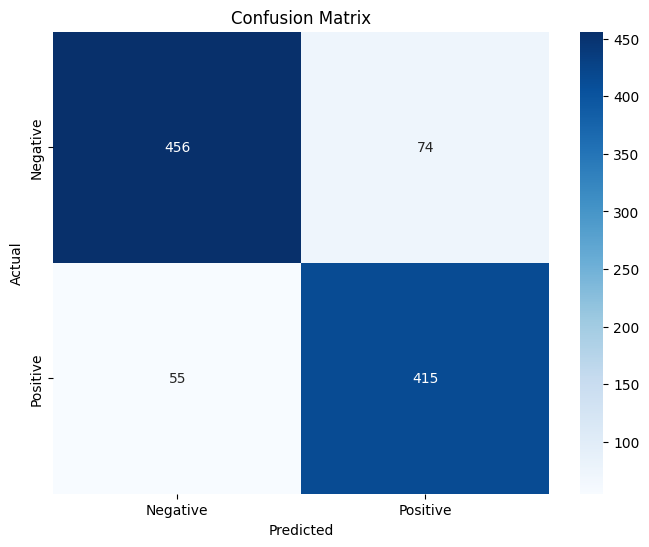

                                                 review  \
2605  Although this movie doesn't have the darkness ...   
122   "A bored television director is introduced to ...   
1044  A good documentary reviewing the background be...   
2527  So when Bob and Marion Boxletter see a guy at ...   
1255  If you haven't figured out what is going to ha...   
3338  *Spoilers - sorry!* The first word that sprung...   
4023  Jude law gives Keanu Reeves a run for his mone...   
1907  This movie is not very good.In fact, it is the...   
681   Never saw the original movie in the series...I...   
501   My Father The Hero used to be my favorite movi...   

                                         cleaned_review  actual_sentiment  \
2605  although movie darkness books opinion great mo...                 1   
122   bored television director introduced black art...                 0   
1044  good documentary reviewing background behind s...                 1   
2527  bob marion boxletter see guy hotel m

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Combine the reviews with their actual and predicted sentiments
results = pd.DataFrame({
    'review': data['review'][y_test.index],
    'cleaned_review': data['cleaned_review'][y_test.index],
    'actual_sentiment': y_test,
    'predicted_sentiment': y_pred
})

# Show a few random examples
print(results.sample(10))

# Test the model with new, unseen movie reviews
new_reviews = [
    "This movie was absolutely fantastic! The storyline was gripping and the characters were so well-developed.",
    "I didn't like this movie at all. The plot was boring and the acting was terrible.",
]

# Preprocess the new reviews
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]

# Convert to TF-IDF features
new_reviews_tfidf = tfidf_vectorizer.transform(new_reviews_cleaned).toarray()

# Predict the sentiment
new_predictions = model.predict(new_reviews_tfidf)

# Map the predictions to labels
sentiment_map = {0: 'negative', 1: 'positive'}
new_predictions_labels = [sentiment_map[pred] for pred in new_predictions]

# Print the results
for review, sentiment in zip(new_reviews, new_predictions_labels):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")


In [6]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'sentiment_model.pkl')


['sentiment_model.pkl']

In [7]:
# Save the TF-IDF vectorizer to a file
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']